In [2]:
!pip install kaggle

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#environment reference for the kaggle api key
%env KAGGLE_CONFIG_DIR=/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4_Tree_Ensembles/Kaggle_Homework_Week

env: KAGGLE_CONFIG_DIR=/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4_Tree_Ensembles/Kaggle_Homework_Week


In [6]:
!kaggle competitions download -c ds1-tree-ensembles

 86%|████████████████████████████████▌     | 4.00M/4.67M [00:00<00:00, 7.57MB/s]
100%|██████████████████████████████████████| 4.67M/4.67M [00:00<00:00, 8.48MB/s]
  0%|                                                | 0.00/295k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 295k/295k [00:00<00:00, 10.2MB/s]
 86%|████████████████████████████████▌     | 1.00M/1.17M [00:00<00:00, 8.43MB/s]
100%|██████████████████████████████████████| 1.17M/1.17M [00:00<00:00, 8.47MB/s]
  0%|                                               | 0.00/92.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 92.2k/92.2k [00:00<00:00, 12.4MB/s]
  0%|                                               | 0.00/23.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 23.0k/23.0k [00:00<00:00, 17.0MB/s]


In [18]:
pwd

'/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4_Tree_Ensembles/Kaggle_Homework_Week'

In [19]:
ls

kaggle.json             sample_submission.csv  train_features.csv
Kaggle_monday_HW.ipynb  test_features.csv      train_features.csv.zip
LCDataDictionary.xlsx   test_features.csv.zip  train_labels.csv


In [44]:
import pandas as pd
pd.set_option('display.max_columns', 105)

In [45]:
df_train_features = pd.read_csv("train_features.csv")

In [46]:
df_train_features.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,4 years,MORTGAGE,81000.0,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,12.76,0,Dec-2005,1,48.0,NaN,7,0,4912,23.5%,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,4 years,RENT,39000.0,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,21.42,0,Mar-2012,1,NaN,NaN,10,0,11876,59.4%,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,46723,NaN,4500,4500,36 months,7.21%,139.38,A,A3,Accounts,3 years,RENT,78000.0,NaN,NaN,debt_consolidation,Debt consolidation,906xx,CA,2.17,0,May-2000,2,NaN,NaN,13,0,1715,5.2%,19,w,0,NaN,Individual,NaN,NaN,0,0,35329,0,8,1,2,10.0,33614,106.0,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.0,218,10,10,0,31.0,NaN,1.0,NaN,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,24878,NaN,12000,12000,36 months,9.44%,384.06,B,B1,Client Processing Associate,10+ years,MORTGAGE,62000.0,NaN,NaN,debt_consolidation,Debt consolidation,441xx,OH,13.76,0,Feb-2003,0,NaN,NaN,22,0,9404,16.3%,33,w,0,NaN,Individual,NaN,NaN,0,0,75160,4,1,0,2,13.0,17123,67.0,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.0,179,1,1,1,1.0,NaN,5.0,NaN,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,39038,NaN,12000,12000,36 months,22.35%,460.47,D,D5,Construction Operator,10+ years,MORTGAGE,70000.0,NaN,NaN,debt_consolidation,Debt consolidation,751xx,TX,14.04,4,Nov-2001,2,13.0,NaN,18,0,17895,24.2%,45,w,0,13.0,Individual,NaN,NaN,0,7218,113702,9,2,2,4,6.0,16711,68.0,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.0,201,0,0,1,0.0,62.0,3.0,62.0,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


In [24]:
df_test_features = pd.read_csv("test_features.csv")

In [25]:
df_test_features.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,57146,NaN,18500,18500,60 months,25.82%,551.93,E,E4,Account Service Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,20988,NaN,36000,36000,60 months,12.61%,811.95,C,C1,Vice President of IT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,10031,NaN,12000,12000,36 months,22.90%,463.90,E,E1,Director of Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,33892,NaN,24875,24875,60 months,11.98%,553.08,B,B5,vp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,35374,NaN,4000,4000,36 months,10.91%,130.79,B,B4,Sales consultant,...,0.0,2.0,7.0,22.9,3.0,3.0,0.0,0.0,NaN,Cash


In [26]:
df_test_features.shape, df_train_features.shape

((9437, 103), (37745, 103))

In [27]:
df_train_labels = pd.read_csv("train_labels.csv")

In [47]:
df_train_labels.shape

(37745, 2)

In [111]:
df_test_features.shape

(9437, 103)

In [28]:
df_train_labels.head()

,id,charged_off
0,43373,0
1,24414,0
2,46723,0
3,24878,0
4,39038,0


In [30]:
df_sample_submission = pd.read_csv("sample_submission.csv")

In [31]:
df_sample_submission.head()

,id,charged_off
0,57146,0.5
1,20988,0.5
2,10031,0.5
3,33892,0.5
4,35374,0.5


In [32]:
df_sample_submission.shape

(9437, 2)

### The total rows in our training set are 37745 

In [211]:
df_train_test_features = pd.concat([df_train_features, df_test_features])

In [212]:
df_train_test_features.shape

(47182, 103)

In [114]:
df_train_test_features.isna().sum()

id                                         0
member_id                              47182
loan_amnt                                  0
funded_amnt                                0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
sub_grade                                  0
emp_title                               4411
emp_length                              4062
home_ownership                             0
annual_inc                                 0
url                                    47182
desc                                   47182
purpose                                    0
title                                      0
zip_code                                   0
addr_state                                 0
dti                                      112
delinq_2yrs                                0
earliest_cr_line                           0
inq_last_6

In [34]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/d8/f3/413bab4ff08e1fc4828dfc59996d721917df8e8583ea85385d51125dceff/pip-19.0.3-py2.py3-none-any.whl
  Found existing installation: pip 19.0.2
    Uninstalling pip-19.0.2:
      Successfully uninstalled pip-19.0.2


In [36]:
!pip install category_encoders

In [116]:
df_train_test_features.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'disbursement_method'],
      dtype='object', length=103)

### Let's drop the columns with NaNs from the merged file

In [213]:
df_no_na = df_train_test_features.dropna(axis=1, how='any')

In [118]:
df_no_na.shape

(47182, 66)

In [119]:
df_no_na.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_12m                   0
                             ..
inq_fi  

In [120]:
df_no_na.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

### let select only numeric columns

In [121]:
import numpy as np
df_train_test_all_numeric = df_no_na.select_dtypes(np.number)

In [122]:
df_train_test_all_numeric.shape

(47182, 53)

In [123]:
df_train_test_all_numeric.head()

,id,loan_amnt,funded_amnt,installment,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,43373,12000,12000,422.01,81000.0,0,1,7,0,4912,15,0,0,0,174783,1,2,0,4,33668,2,5,2962,20900,1,1,2,9,0,0,23,1,1,1,2,2,2,2,2,9,4,5,2,7,0,0,2,0,0,206618,38580,5500,40863
1,24414,6300,6300,215.54,39000.0,0,1,10,0,11876,12,0,0,0,31046,0,1,0,2,19170,3,8,5153,20000,1,0,1,10,0,0,72,8,8,0,0,6,7,7,8,2,9,10,7,10,0,0,3,0,0,43140,31046,16900,23140
2,46723,4500,4500,139.38,78000.0,0,2,13,0,1715,19,0,0,0,35329,0,8,1,2,33614,1,1,1196,33300,4,0,3,3,0,0,218,10,10,0,0,3,3,3,4,13,5,6,3,13,0,0,2,0,0,65092,35329,23300,31792
3,24878,12000,12000,384.06,62000.0,0,0,22,0,9404,33,0,0,0,75160,4,1,0,2,17123,6,9,6898,57600,3,1,2,12,0,0,179,1,1,1,0,1,3,9,13,7,20,25,3,22,0,0,7,0,0,133065,26527,40500,25465
4,39038,12000,12000,460.47,70000.0,4,2,18,0,17895,45,0,0,7218,113702,9,2,2,4,16711,9,10,5373,73900,3,6,3,14,0,0,201,0,0,1,6,9,11,11,14,22,15,20,11,18,0,2,11,0,0,192842,34606,43300,24499


In [96]:
# df_y = df_merged_all_numeric.iloc[:,0:2]

In [124]:
# df_y.head()

In [94]:
# X = df_merged_all_numeric.iloc[:, 2:56]

### Baseline Model 
Let's split our data back into training and test

In [129]:
X_cleaned = df_train_test_all_numeric[:-9437]
X_test_original_shape = df_train_test_all_numeric[-9437:]
y = df_train_labels['charged_off']

In [130]:
X_cleaned.shape, X_test_original_shape.shape, y.shape

((37745, 53), (9437, 53), (37745,))

### train a decision tree

In [144]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(X_cleaned,y)
dt.score(X_cleaned,y)

1.0

In [132]:
y_pred = dt.predict_proba(X_test_original_shape)

In [136]:
y_pred.shape

(9437, 2)

In [139]:
sample_submission = pd.read_csv('sample_submission.csv') 
first_submission= sample_submission.copy()
first_submission.charged_off = y_pred
first_submission.to_csv('manjula_first.csv', index=False)

In [147]:
# from dtreeviz.trees import dtreeviz
# dtreeviz(dt, X_cleaned, y,
#         target_name='loan paid',
#         feature_names=X_cleaned.columns,
#         class_names=['No', 'Yes'])

### Working with non numeric columns

In [241]:
df_train_features.shape

(37745, 103)

In [244]:
df_train_test_features.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,4 years,MORTGAGE,81000.0,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,12.76,0,Dec-2005,1,48.0,NaN,7,0,4912,23.5%,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,4 years,RENT,39000.0,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,21.42,0,Mar-2012,1,NaN,NaN,10,0,11876,59.4%,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,46723,NaN,4500,4500,36 months,7.21%,139.38,A,A3,Accounts,3 years,RENT,78000.0,NaN,NaN,debt_consolidation,Debt consolidation,906xx,CA,2.17,0,May-2000,2,NaN,NaN,13,0,1715,5.2%,19,w,0,NaN,Individual,NaN,NaN,0,0,35329,0,8,1,2,10.0,33614,106.0,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.0,218,10,10,0,31.0,NaN,1.0,NaN,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,24878,NaN,12000,12000,36 months,9.44%,384.06,B,B1,Client Processing Associate,10+ years,MORTGAGE,62000.0,NaN,NaN,debt_consolidation,Debt consolidation,441xx,OH,13.76,0,Feb-2003,0,NaN,NaN,22,0,9404,16.3%,33,w,0,NaN,Individual,NaN,NaN,0,0,75160,4,1,0,2,13.0,17123,67.0,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.0,179,1,1,1,1.0,NaN,5.0,NaN,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,39038,NaN,12000,12000,36 months,22.35%,460.47,D,D5,Construction Operator,10+ years,MORTGAGE,70000.0,NaN,NaN,debt_consolidation,Debt consolidation,751xx,TX,14.04,4,Nov-2001,2,13.0,NaN,18,0,17895,24.2%,45,w,0,13.0,Individual,NaN,NaN,0,7218,113702,9,2,2,4,6.0,16711,68.0,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.0,201,0,0,1,0.0,62.0,3.0,62.0,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


### Data Wrangle

In [245]:
df_train_test_features['revol_util'] = df_train_test_features['revol_util'].str.strip('%').astype(float)

In [250]:
df_train_test_features['int_rate'] = df_train_test_features['int_rate'].str.strip('%').astype(float)

In [247]:
 df_train_test_features= df_train_test_features.drop(columns=['id', 'member_id', 'url', 'desc', 'title', 'grade'])

In [248]:
# Transform sub_grade from "A1" - "G5" to 1.1 - 7.5
def wrangle_sub_grade(x):
    first_digit = ord(x[0]) - 64
    second_digit = int(x[1])
    return first_digit+second_digit/10

df_train_test_features['sub_grade'] = df_train_test_features['sub_grade'].apply(wrangle_sub_grade)

In [251]:
#transform earlier cr line to an intiger: how many days it's been open
df_train_test_features['earliest_cr_line'] = pd.to_datetime(df_train_test_features['earliest_cr_line'], infer_datetime_format=True)
df_train_test_features['earliest_cr_line'] = pd.Timestamp.today() - df_train_test_features['earliest_cr_line']
df_train_test_features['earliest_cr_line'] = df_train_test_features['earliest_cr_line'].dt.days

In [252]:
 # Create features for three employee titles: teacher, manager, owner
df_train_test_features['emp_title'] = df_train_test_features['emp_title'].str.lower()
df_train_test_features['emp_title_teacher'] = df_train_test_features['emp_title'].str.contains('teacher', na=False)
df_train_test_features['emp_title_manager'] = df_train_test_features['emp_title'].str.contains('manager', na=False)
df_train_test_features['emp_title_owner']   = df_train_test_features['emp_title'].str.contains('owner', na=False)

In [253]:
df_train_test_features.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,emp_title_teacher,emp_title_manager,emp_title_owner
0,12000,12000,36 months,16.02,422.01,3.5,driver,4 years,MORTGAGE,81000.0,debt_consolidation,280xx,NC,12.76,0,4856,1,48.0,NaN,7,0,4912,23.5,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,False,False,False
1,6300,6300,36 months,14.07,215.54,3.3,gmp lead,4 years,RENT,39000.0,debt_consolidation,920xx,CA,21.42,0,2574,1,NaN,NaN,10,0,11876,59.4,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,False,False,False
2,4500,4500,36 months,7.21,139.38,1.3,accounts,3 years,RENT,78000.0,debt_consolidation,906xx,CA,2.17,0,6896,2,NaN,NaN,13,0,1715,5.2,19,w,0,NaN,Individual,NaN,NaN,0,0,35329,0,8,1,2,10.0,33614,106.0,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.0,218,10,10,0,31.0,NaN,1.0,NaN,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,False,False,False
3,12000,12000,36 months,9.44,384.06,2.1,client processing associate,10+ years,MORTGAGE,62000.0,debt_consolidation,441xx,OH,13.76,0,5890,0,NaN,NaN,22,0,9404,16.3,33,w,0,NaN,Individual,NaN,NaN,0,0,75160,4,1,0,2,13.0,17123,67.0,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.0,179,1,1,1,1.0,NaN,5.0,NaN,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,False,False,False
4,12000,12000,36 months,22.35,460.47,4.5,construction operator,10+ years,MORTGAGE,70000.0,debt_consolidation,751xx,TX,14.04,4,6347,2,13.0,NaN,18,0,17895,24.2,45,w,0,13.0,Individual,NaN,NaN,0,7218,113702,9,2,2,4,6.0,16711,68.0,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.0,201,0,0,1,0.0,62.0,3.0,62.0,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,False,False,False


In [254]:
df_train_test_features.isna().sum()

loan_amnt                                  0
funded_amnt                                0
term                                       0
int_rate                                   0
installment                                0
sub_grade                                  0
emp_title                               4411
emp_length                              4062
home_ownership                             0
annual_inc                                 0
purpose                                    0
zip_code                                   0
addr_state                                 0
dti                                      112
delinq_2yrs                                0
earliest_cr_line                           0
inq_last_6mths                             0
mths_since_last_delinq                 26118
mths_since_last_record                 40192
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util

In [272]:
def mean_fill_na(X):
    for col in X:
        if X[col].dtypes == int or X[col].dtypes ==float:
            if X[col].isnull().sum()>0:
                X[col]=X[col].fillna(X[col].mean())
            
    return X

In [273]:
mean_fill_na(df_train_test_features) 

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,emp_title_teacher,emp_title_manager,emp_title_owner
0,12000,12000,36 months,16.02,422.01,3.5,driver,4 years,MORTGAGE,81000.0,debt_consolidation,280xx,NC,12.76,0,4856,1,48.000000,82.185265,7,0,4912,23.5,15,w,0,48.000000,Individual,125730.011763,18.956162,0,0,174783,1,2,0,4,13.000000,33668,82.00000,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.000000,23,1,1,1,8.0,40.672357,1.000000,37.868683,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,33673.675289,NaN,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,Cash,False,False,False
1,6300,6300,36 months,14.07,215.54,3.3,gmp lead,4 years,RENT,39000.0,debt_consolidation,920xx,CA,21.42,0,2574,1,36.873054,82.185265,10,0,11876,59.4,12,w,0,46.099436,Individual,125730.011763,18.956162,0,0,31046,0,1,0,2,14.000000,19170,83.00000,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.000000,72,8,8,0,8.0,40.672357,6.000000,37.868683,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,33673.675289,NaN,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,Cash,False,False,False
2,4500,4500,36 months,7.21,139.38,1.3,accounts,3 years,RENT,78000.0,debt_consolidation,906xx,CA,2.17,0,6896,2,36.873054,82.185265,13,0,1715,5.2,19,w,0,46.099436,Individual,125730.011763,18.956162,0,0,35329,0,8,1,2,10.000000,33614,106.00000,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.000000,218,10,10,0,31.0,40.672357,1.000000,37.868683,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,33673.675289,NaN,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,Cash,False,False,False
3,12000,12000,36 months,9.44,384.06,2.1,client processing associate,10+ years,MORTGAGE,62000.0,debt_consolidation,441xx,OH,13.76,0,5890,0,36.873054,82.185265,22,0,9404,16.3,33,w,0,46.099436,Individual,125730.011763,18.956162,0,0,75160,4,1,0,2,13.000000,17123,67.00000,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.000000,179,1,1,1,1.0,40.672357,5.000000,37.868683,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,33673.675289,NaN,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,Cash,False,False,False
4,12000,12000,36 months,22.35,460.47,4.5,construction operator,10+ years,MORTGAGE,70000.0,debt_consolidation,751xx,TX,14.04,4,6347,2,13.000000,82.185265,18,0,17895,24.2,45,w,0,13.000000,Individual,125730.011763,18.95616

In [274]:
df_no_na = df_train_test_features.dropna(axis=1, how='any')

In [276]:
df_main = df_no_na

In [278]:
df_main.isna().sum()

loan_amnt                              0
funded_amnt                            0
term                                   0
int_rate                               0
installment                            0
sub_grade                              0
home_ownership                         0
annual_inc                             0
purpose                                0
zip_code                               0
addr_state                             0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
collections_12_mths_ex_med             0
mths_since_last_

In [154]:
df_no_na.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
total_acc                       int64
initial_list_status            object
collections_12_mths_ex_med      int64
application_type               object
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal 

In [155]:
df_no_na.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,43373,12000,12000,36 months,16.02%,422.01,C,C5,MORTGAGE,81000.0,debt_consolidation,Debt consolidation,280xx,NC,0,Dec-2005,1,7,0,4912,15,w,0,Individual,0,0,174783,1,2,0,4,33668,2,5,2962,20900,1,1,2,9,0,0,23,1,1,1,2,2,2,2,2,9,4,5,2,7,0,0,2,0,0,206618,38580,5500,40863,Cash
1,24414,6300,6300,36 months,14.07%,215.54,C,C3,RENT,39000.0,debt_consolidation,Debt consolidation,920xx,CA,0,Mar-2012,1,10,0,11876,12,w,0,Individual,0,0,31046,0,1,0,2,19170,3,8,5153,20000,1,0,1,10,0,0,72,8,8,0,0,6,7,7,8,2,9,10,7,10,0,0,3,0,0,43140,31046,16900,23140,Cash
2,46723,4500,4500,36 months,7.21%,139.38,A,A3,RENT,78000.0,debt_consolidation,Debt consolidation,906xx,CA,0,May-2000,2,13,0,1715,19,w,0,Individual,0,0,35329,0,8,1,2,33614,1,1,1196,33300,4,0,3,3,0,0,218,10,10,0,0,3,3,3,4,13,5,6,3,13,0,0,2,0,0,65092,35329,23300,31792,Cash
3,24878,12000,12000,36 months,9.44%,384.06,B,B1,MORTGAGE,62000.0,debt_consolidation,Debt consolidation,441xx,OH,0,Feb-2003,0,22,0,9404,33,w,0,Individual,0,0,75160,4,1,0,2,17123,6,9,6898,57600,3,1,2,12,0,0,179,1,1,1,0,1,3,9,13,7,20,25,3,22,0,0,7,0,0,133065,26527,40500,25465,Cash
4,39038,12000,12000,36 months,22.35%,460.47,D,D5,MORTGAGE,70000.0,debt_consolidation,Debt consolidation,751xx,TX,4,Nov-2001,2,18,0,17895,45,w,0,Individual,0,7218,113702,9,2,2,4,16711,9,10,5373,73900,3,6,3,14,0,0,201,0,0,1,6,9,11,11,14,22,15,20,11,18,0,2,11,0,0,192842,34606,43300,24499,Cash


### Getting rid of the % sign from int_rate column

In [279]:
# df_no_na['int_rate_float'] = df_no_na.int_rate.str.replace('%','')

### Converting the new int_rate_float column to float data type

In [280]:
# df_no_na['int_rate_float'] = df_no_na['int_rate_float'].astype(float)

In [220]:
df_no_na.shape

(47182, 63)

### Fitting a second model

In [281]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [283]:
dummyEncode(df_no_na)

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,emp_title_teacher,emp_title_manager,emp_title_owner
0,12000,12000,0,16.02,422.01,3.5,1,81000.0,2,253,26,12.76,0,4856,1,48.000000,82.185265,7,0,4912,23.5,15,1,0,48.000000,0,125730.011763,18.956162,0,0,174783,1,2,0,4,13.000000,33668,82.00000,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.000000,23,1,1,1,8.0,40.672357,1.000000,37.868683,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,33673.675289,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,0,False,False,False
1,6300,6300,0,14.07,215.54,3.3,3,39000.0,2,792,4,21.42,0,2574,1,36.873054,82.185265,10,0,11876,59.4,12,1,0,46.099436,0,125730.011763,18.956162,0,0,31046,0,1,0,2,14.000000,19170,83.00000,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.000000,72,8,8,0,8.0,40.672357,6.000000,37.868683,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,33673.675289,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,0,False,False,False
2,4500,4500,0,7.21,139.38,1.3,3,78000.0,2,779,4,2.17,0,6896,2,36.873054,82.185265,13,0,1715,5.2,19,1,0,46.099436,0,125730.011763,18.956162,0,0,35329,0,8,1,2,10.000000,33614,106.00000,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.000000,218,10,10,0,31.0,40.672357,1.000000,37.868683,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,33673.675289,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,0,False,False,False
3,12000,12000,0,9.44,384.06,2.1,1,62000.0,2,403,34,13.76,0,5890,0,36.873054,82.185265,22,0,9404,16.3,33,1,0,46.099436,0,125730.011763,18.956162,0,0,75160,4,1,0,2,13.000000,17123,67.00000,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.000000,179,1,1,1,1.0,40.672357,5.000000,37.868683,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,33673.675289,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,0,False,False,False
4,12000,12000,0,22.35,460.47,4.5,1,70000.0,2,652,42,14.04,4,6347,2,13.000000,82.185265,18,0,17895,24.2,45,1,0,13.000000,0,125730.011763,18.956162,0,7218,113702,9,2,2,4,6.000000,16711,68.00000,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.000000,201,0,0,1,0.0,62.000000,3.000000,62.000000,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,33673.675289,0.728216,1.734173,11.336283,55.348852,2.896358,12.905208,0.049523,0.072839,36.387427,0,False,False,False
5,35000,35000,0,15.49,1221.71,3.4,3,100000.0,3,92,3

In [223]:
df_no_na.dtypes

loan_amnt                       int64
funded_amnt                     int64
term                            int64
installment                   float64
sub_grade                       int64
home_ownership                  int64
annual_inc                    float64
purpose                         int64
zip_code                        int64
addr_state                      int64
delinq_2yrs                     int64
earliest_cr_line                int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
total_acc                       int64
initial_list_status             int64
collections_12_mths_ex_med      int64
application_type                int64
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal                     int64
open_acc_6m                     int64
open_act_il                     int64
open_il_12m                     int64
open_il_24m 

In [224]:
X = df_no_na[:-9437]
X_test = df_no_na[-9437:]
y = df_train_labels['charged_off']

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
dt.score(X,y)

0.8528546827394357

In [202]:
df_no_na.head()

,id,loan_amnt,funded_amnt,term,installment,grade,sub_grade,home_ownership,annual_inc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,int_rate_float
0,43373,12000,12000,0,422.01,2,14,1,81000.0,2,3,253,26,0,141,1,7,0,4912,15,1,0,0,0,0,174783,1,2,0,4,33668,2,5,2962,20900,1,1,2,9,0,0,23,1,1,1,2,2,2,2,2,9,4,5,2,7,0,0,2,0,0,206618,38580,5500,40863,0,66
1,24414,6300,6300,0,215.54,2,12,3,39000.0,2,3,792,4,0,406,1,10,0,11876,12,1,0,0,0,0,31046,0,1,0,2,19170,3,8,5153,20000,1,0,1,10,0,0,72,8,8,0,0,6,7,7,8,2,9,10,7,10,0,0,3,0,0,43140,31046,16900,23140,0,57
2,46723,4500,4500,0,139.38,0,2,3,78000.0,2,3,779,4,0,444,2,13,0,1715,19,1,0,0,0,0,35329,0,8,1,2,33614,1,1,1196,33300,4,0,3,3,0,0,218,10,10,0,0,3,3,3,4,13,5,6,3,13,0,0,2,0,0,65092,35329,23300,31792,0,13
3,24878,12000,12000,0,384.06,1,5,1,62000.0,2,3,403,34,0,189,0,22,0,9404,33,1,0,0,0,0,75160,4,1,0,2,17123,6,9,6898,57600,3,1,2,12,0,0,179,1,1,1,0,1,3,9,13,7,20,25,3,22,0,0,7,0,0,133065,26527,40500,25465,0,26
4,39038,12000,12000,0,460.47,3,19,1,70000.0,2,3,652,42,4,495,2,18,0,17895,45,1,0,0,0,7218,113702,9,2,2,4,16711,9,10,5373,73900,3,6,3,14,0,0,201,0,0,1,6,9,11,11,14,22,15,20,11,18,0,2,11,0,0,192842,34606,43300,24499,0,84


In [209]:
df_no_na= df_no_na.drop(columns=['id'])

In [200]:
y_pred = dt.predict_proba(X_test)

In [198]:
y_pred.shape

(9437, 2)

In [207]:
sample_submission = pd.read_csv('sample_submission.csv') 
submission = sample_submission.copy() 
submission['charged_off'] =dt.predict_proba(X_test)[:, 1] 
submission.to_csv('submission-001.csv', index=False)

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
X = df_no_na[:-9437]
X_test = df_no_na[-9437:]
y = df_train_labels['charged_off']

rf = RandomForestClassifier(n_estimators=100, 
                            class_weight='balanced', 
                            min_samples_leaf=0.005, 
                            oob_score=True, n_jobs=-1)

rf.fit(X,y)
cross_val_score(rf, X, y, cv=5, scoring='roc_auc', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.7283465728153806, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ....................... , score=0.7294083089576432, total=   2.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] ....................... , score=0.7233868773643441, total=   2.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s


[CV] ....................... , score=0.7315535374599901, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s remaining:    0.0s


[CV] ....................... , score=0.7361948621501277, total=   2.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s finished


array([0.72834657, 0.72940831, 0.72338688, 0.73155354, 0.73619486])

In [287]:
y_pred = rf.predict_proba(X_test)

In [288]:
sample_submission = pd.read_csv('sample_submission.csv') 
submission = sample_submission.copy() 
submission['charged_off'] =rf.predict_proba(X_test)[:, 1] 
submission.to_csv('submission-003.csv', index=False)

### Out-of-Bag Estiamte score

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
X = df_main[:-9437]
X_test = df_main[-9437:]
y = df_train_labels['charged_off']

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        min_samples_leaf=0.005, 
        oob_score=True, n_jobs=-1)
)

pipe.fit(X,y)
cross_val_score(rf, X, y, cv=5, scoring='roc_auc', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.7290260785668565, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ....................... , score=0.7296807965978331, total=   2.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] ....................... , score=0.7241911982437759, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s


[CV] ....................... , score=0.7298207453550574, total=   2.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s remaining:    0.0s


[CV] ....................... , score=0.7369612856099341, total=   2.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s finished


array([0.72902608, 0.7296808 , 0.7241912 , 0.72982075, 0.73696129])

In [294]:
from sklearn.pipeline import make_pipeline
pipe.fit(X,y)
y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:,1]
print('ROC AUC, Out-of-bag estimate:', roc_auc_score(y, y_pred_proba))

ROC AUC, Out-of-bag estimate: 0.7276688909631672


### Let's explore hyperparameter value

In [295]:
%%time

max_depths = list(range(2, 12, 2)) + [None]

for max_depth in max_depths:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=100, 
            class_weight='balanced', 
            max_depth=max_depth, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X, y)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('Max Depth:', max_depth)
    print('ROC AUC, OOB:', roc_auc_score(y, y_pred_proba))

Max Depth: 2
ROC AUC, OOB: 0.6977698224453796
Max Depth: 4
ROC AUC, OOB: 0.7136984755657029
Max Depth: 6
ROC AUC, OOB: 0.7252057111358209
Max Depth: 8
ROC AUC, OOB: 0.7271375154376268
Max Depth: 10
ROC AUC, OOB: 0.7248569141467653
Max Depth: None
ROC AUC, OOB: 0.7042378892898747
CPU times: user 1min 21s, sys: 356 ms, total: 1min 21s
Wall time: 17.3 s


### Show feature importance 

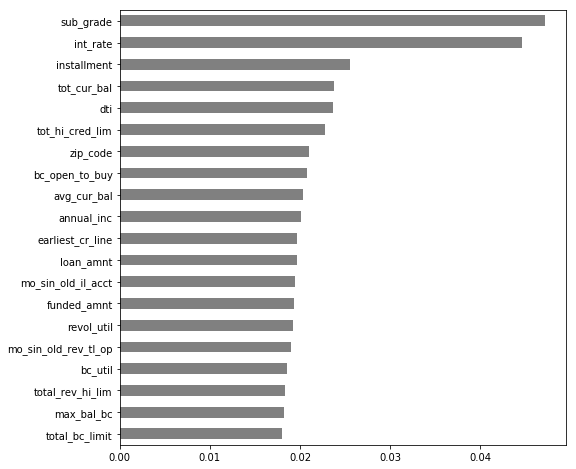

In [299]:
import matplotlib.pyplot as plt
def show_feature_importance(
pipe, X, y, estimator_name='randomforestclassifier',
n=20, figsize=(8,8)):
    
    #pipe must not change dimensions of X dataframe
    pipe.fit(X,y)
    
    importances = pd.Series(
    pipe.named_steps[estimator_name].feature_importances_,
    X.columns)
    
    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='grey')


show_feature_importance(pipe, X, y)

### drop column importance/"Ablation Study"

In [301]:
cross_val_score(pipe, X.drop(columns='sub_grade'), y, cv=5, scoring='roc_auc')

array([0.72759752, 0.72352438, 0.722264  , 0.72286413, 0.72675226])

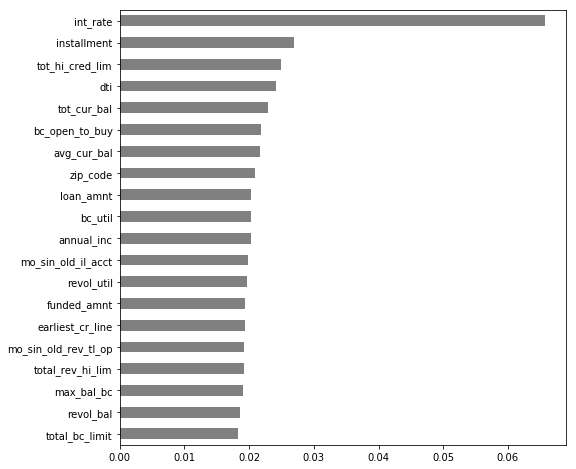

In [303]:
show_feature_importance(pipe, X.drop(columns='sub_grade'), y)

In [304]:
cross_val_score(pipe, X.drop(columns=['sub_grade', 'int_rate']), y, cv=5, scoring='roc_auc')

array([0.70893509, 0.70892175, 0.71054214, 0.71513312, 0.70824077])

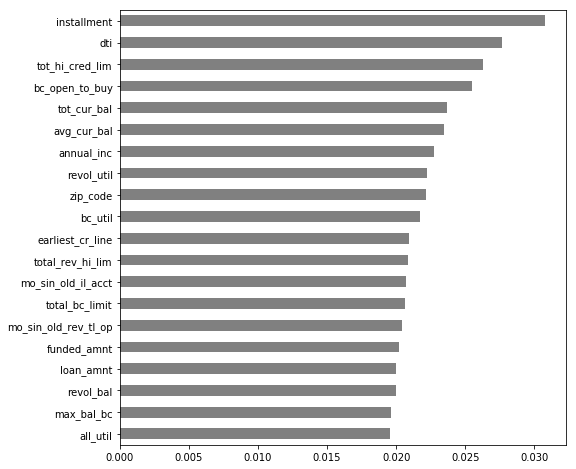

In [305]:
show_feature_importance(pipe, X.drop(columns=['sub_grade', 'int_rate']), y)

## permutation importance

In [308]:
!pip install eli5

    100% |████████████████████████████████| 102kB 762kB/s a 0:00:01
    100% |████████████████████████████████| 51kB 678kB/s eta 0:00:01
  Stored in directory: /home/mishraka/.cache/pip/wheels/2b/67/89/414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


In [309]:
import eli5
from eli5.sklearn import PermutationImportance

encoder = ce.OrdinalEncoder()
X_train_transformed = encoder.fit_transform(X)

model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    min_samples_leaf=0.005,
    n_jobs=-1)

model.fit(X_train_transformed, y)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=1, cv='prefit')
permuter.fit(X_train_transformed, y)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=0.005,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
           n_iter=1, random_state=None, refit=True, scoring='roc_auc')

In [ ]:
eli5.show_weights(permuter, top=None, feature_names=X_train_transformed.columns.tolist())

In [ ]:
subset = X_train.columns[permuter.feature_importances_ > 0]
cross_val_score(pipe, X_train[subset], y_train, cv=5, scoring='roc_auc', verbose=10)

In [187]:
import category_encoders as ce
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

X = df_no_na[:-9437]
X_test = df_no_na[-9437:]
y = df_train_labels['charged_off']

pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=2)
)

In [188]:
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['term', 'grade', 'sub_grade', 'home_ownership', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type', 'disbursement_method', 'int_rate_float'],
       drop_invariant=False, handle_unknown='impute', im...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [189]:
pipe.score(X,y)

0.8528546827394357

In [190]:
y_pred = pipe.predict_proba(X_test)